In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from random import random
from tqdm import tqdm

Experimentación. Realizar experimentos sobre todas las instancias comparando el modelo propuesto respecto al de la solución actual de la compañía. En cada caso, medir la mejora porcentual obtenida. Sean $z_b$ y $z_g$ el valor de la función objetivo de una solución del modelo para el batching y el de FCFS, respectivamente. definimos la mejora relativa como

$$
    \%\text{gap}= \frac{z_g − z_b}{z_b}
$$

En caso de considerarlo conveniente, pueden agregar otras métricas complementarias (respecto al método o a las soluciones) para el análisis de los resultados.
Sugerencia: se recomienda sistematizar la realización de experimentos, idealmente definiendo
la lista de instancias a considerar y reportando en algún formato conveniente (por ejemplo, csv)
el resumen de los resultados obtenidos, para ser analizados posteriormente.

In [26]:
solutions = pd.read_csv('../output/results.csv')
solutions

,filename,n,greedy_cost,min_cost_flow_cost,greedy_time,min_cost_flow_time
0,input/small_0.csv,10,36.9,29.3,0.002292,1
1,input/small_1.csv,10,42.4,32.4,0.002000,0
2,input/small_2.csv,10,65.6,56.9,0.002041,0
3,input/small_3.csv,10,29.5,23.7,0.002125,0
4,input/small_4.csv,10,33.9,30.8,0.002208,0
5,input/small_5.csv,10,63.6,54.4,0.002417,0
6,input/small_6.csv,10,44.9,41.0,0.002125,0
7,input/small_7.csv,10,56.3,46.9,0.002125,0
8,input/small_8.csv,10,38.1,35.5,0.002208,0
9,input/small_9.csv,10,58.1,49.7,0.001958,0


In [27]:
solutions["gap"] = (solutions["greedy_cost"] - solutions["min_cost_flow_cost"]) / solutions["min_cost_flow_cost"]

In [28]:
solutions

,filename,n,greedy_cost,min_cost_flow_cost,greedy_time,min_cost_flow_time,gap
0,input/small_0.csv,10,36.9,29.3,0.002292,1,0.259386
1,input/small_1.csv,10,42.4,32.4,0.002000,0,0.308642
2,input/small_2.csv,10,65.6,56.9,0.002041,0,0.152900
3,input/small_3.csv,10,29.5,23.7,0.002125,0,0.244726
4,input/small_4.csv,10,33.9,30.8,0.002208,0,0.100649
5,input/small_5.csv,10,63.6,54.4,0.002417,0,0.169118
6,input/small_6.csv,10,44.9,41.0,0.002125,0,0.095122
7,input/small_7.csv,10,56.3,46.9,0.002125,0,0.200426
8,input/small_8.csv,10,38.1,35.5,0.002208,0,0.073239
9,input/small_9.csv,10,58.1,49.7,0.001958,0,0.169014


In [29]:
avg_gap = solutions["gap"].mean()
avg_gap

0.19164428484224535

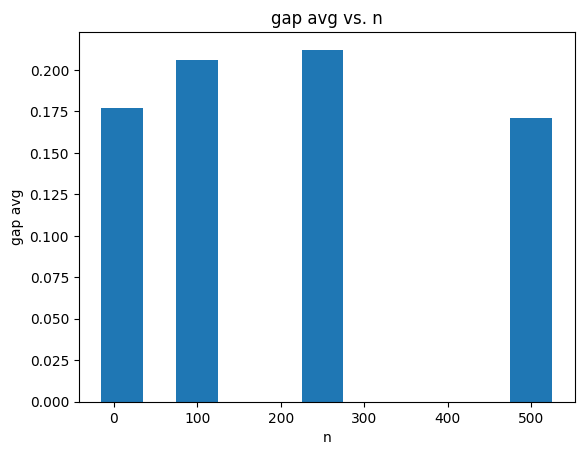

In [32]:
# Plot gap avg vs. n

avg_10  = solutions[solutions["n"] == 10]["gap"].mean()
avg_100 = solutions[solutions["n"] == 100]["gap"].mean()
avg_250 = solutions[solutions["n"] == 250]["gap"].mean()
avg_500 = solutions[solutions["n"] == 500]["gap"].mean()

# Plot gap avg vs. n
# Bar plot

ns = [10, 100, 250, 500]
avg_gaps = [avg_10, avg_100, avg_250, avg_500]

plt.bar(ns, avg_gaps, width=50)
plt.xlabel("n")
plt.ylabel("gap avg")
plt.title("gap avg vs. n")


plt.savefig("../output/gap_avg_vs_n.png")

plt.show()

## Idea: Generar instancias de prueba

Para cada $ n \in [2, 500] $, generar 10 instancias de prueba.

Ejemplo de instancia small_0:

10

-73.95787684429749,40.80107832750914
-73.99859389615287,40.72681272648666
-73.97613791642482,40.734920152887305
-73.95696156483291,40.76563597097822
-73.95290293686591,40.777139494435374
-74.01242622944504,40.70335908207175
-73.98976945027903,40.74715127450688
-73.99151240293912,40.75101731701905
-73.9885286873513,40.76478427621614
-73.98161858061569,40.720222744955386
-74.00070510387474,40.73729460206807,1.0621644000000001,6.96
-73.97178352556233,40.760357828133294,4.1199104,16.0
-73.97953722550209,40.78052689849282,3.8624159999999996,13.3
-73.97738435035566,40.76507454063362,1.4162192,9.3
-73.97371788498211,40.78526104848797,3.379614,12.95
-73.94433486173024,40.77458478321152,1.9312079999999998,11.15
-73.98402752048139,40.755321924476995,3.781949,15.38
-73.97725567941671,40.761841698580156,3.2991469999999996,19.9
-73.96741890580599,40.749132879508416,1.2874720000000002,6.3
-73.9535389820928,40.7750968958531,1.1265379999999998,6.96
10.6,5.3,4.3,5.5,3.2,3.9,7.1,5.8,5.8,2.9
1.2,6.1,7.1,5.9,8.1,10.4,4.2,5.6,5.5,9.5
2.9,2.8,4.6,2.9,4.9,7.2,2.8,2.6,2.3,6.2
7.5,2.1,3.9,2.3,3.7,2.2,4.0,2.6,2.7,1.3
9.0,3.6,3.3,3.8,3.1,1.2,5.5,4.1,4.2,0.3
4.4,9.8,10.8,9.6,11.8,14.1,7.9,9.3,9.2,13.2
2.1,3.2,4.2,3.0,5.3,7.6,1.4,2.7,2.7,6.6
2.3,3.1,4.0,2.9,5.1,7.4,1.2,2.6,2.9,6.4
3.9,2.3,2.4,1.3,3.5,5.8,1.4,1.5,3.8,4.8
3.7,4.8,5.8,4.6,6.9,9.2,3.5,4.3,4.2,8.2

Una instancia de prueba es un csv de la forma:

En la primera línea, el número de taxis/pasajeros $n$.
Entre la fila 2 y $n+1$, las coordenadas de los taxis.
Entre la fila $n+2$ y $2n+1$, las coordenadas de los pasajeros, la distancia de su viaje, el costo del viaje.
Entre la fila $2n+2$ y $3n+1$, la matriz de distancias entre taxis y pasajeros.

Generar una instancia de prueba es generar un csv de la forma anterior.

Ejemplo para $n=10$:

In [20]:
"""
Para cada $ n \in [2, 500] $, generar 10 instancias de prueba.

Ejemplo de instancia small_0:

Una instancia de prueba es un csv de la forma:

En la primera línea, el número de taxis/pasajeros $n$.
Entre la fila 2 y $n+1$, las coordenadas de los taxis.
Entre la fila $n+2$ y $2n+1$, las coordenadas de los pasajeros, la distancia de su viaje, el costo del viaje.
Entre la fila $2n+2$ y $3n+1$, la matriz de distancias entre taxis y pasajeros.
"""

# Ejemplo para n = 10

n = 10

# taxis
taxis : List[Tuple[int]]= [(random() * 100, random() * 100) for _ in range(n)]

# pasajeros
pasajeros : List[Tuple[int]] = [(random() * 100, random() * 100, random() * 100, random() * 100) for _ in range(n)]

# matriz de distancias
# Formula para calcular la distancia entre dos puntos (x1, y1) y (x2, y2):
# sqrt((x1 - x2)^2 + (y1 - y2)^2)

distancias : List[List[float]] = []

for i in range(n):
    distancias.append([])
    for j in range(n):
        distancias[i].append(((taxis[i][0] - pasajeros[j][0]) ** 2 + (taxis[i][1] - pasajeros[j][1]) ** 2) ** 0.5)

# display(n)
# display(taxis)
# display(pasajeros)
# display(distancias)

# Guardar en ../input/fake_instances/small_test.csv

with open('../input/fake_instances/small_test.csv', 'w') as f:
    f.write(str(n) + '\n')
    for i in range(n):
        f.write(str(taxis[i][0]) + ',' + str(taxis[i][1]) + '\n')
    for i in range(n):
        f.write(str(pasajeros[i][0]) + ',' + str(pasajeros[i][1]) + ',' + str(pasajeros[i][2]) + ',' + str(pasajeros[i][3]) + '\n')
    for i in range(n):
        for j in range(n):
            f.write(str(distancias[i][j]) + ',')
        f.write('\n')


In [23]:
def generate_instance(n: int):
    # taxis
    taxis : List[Tuple[int]]= [(random() * 100, random() * 100) for _ in range(n)]

    # pasajeros
    pasajeros : List[Tuple[int]] = [(random() * 100, random() * 100, random() * 100, random() * 100) for _ in range(n)]

    # matriz de distancias
    # Formula para calcular la distancia entre dos puntos (x1, y1) y (x2, y2):
    # sqrt((x1 - x2)^2 + (y1 - y2)^2)

    distancias : List[List[float]] = []

    for i in range(n):
        distancias.append([])
        for j in range(n):
            distancias[i].append(((taxis[i][0] - pasajeros[j][0]) ** 2 + (taxis[i][1] - pasajeros[j][1]) ** 2) ** 0.5)
    
    return taxis, pasajeros, distancias

def write_csv(n, k, taxis, pasajeros, distancias):
    with open('../input/fake_instances/fake_' + str(n) + "_" + str(k)+ '.csv', 'w') as f:
        f.write(str(n) + '\n')
        for i in range(n):
            f.write(str(taxis[i][0]) + ',' + str(taxis[i][1]) + '\n')
        for i in range(n):
            f.write(str(pasajeros[i][0]) + ',' + str(pasajeros[i][1]) + ',' + str(pasajeros[i][2]) + ',' + str(pasajeros[i][3]) + '\n')
        for i in range(n):
            for j in range(n):
                f.write(str(distancias[i][j]) + ',')
            f.write('\n')

In [ ]:
# Generar 10 instancias de prueba para cada n en [2, 500]
for n in tqdm(range(2, 501)):
    for i in range(1):
        taxis, pasajeros, distancias = generate_instance(n)
        write_csv(n, taxis, pasajeros, distancias)

In [21]:
!mkdir ../input/fake_instances

In [24]:
!rm -rf ../input/fake_instances && mkdir ../input/fake_instances

In [11]:
def gen_save(n):
    taxis, pasajeros, distancias = generate_instance(n)
    write_csv(n, taxis, pasajeros, distancias)

In [15]:
!pip3 install multiprocess

     |████████████████████████████████| 132 kB 10.0 MB/s eta 0:00:01


In [ ]:
from multiprocess import Pool

In [25]:
# Paralelizar el código anterior

with Pool(8) as p:
    instances = p.map(generate_instance, range(2, 501))
    for j in range(10):
        for n, (taxis, pasajeros, distancias) in enumerate(tqdm(instances)):
            write_csv(n, j, taxis, pasajeros, distancias)


100%|██████████| 499/499 [00:35<00:00, 14.08it/s] 


In [36]:
ad_hoc_solutions = pd.read_csv("../output/fake/results.csv")
ad_hoc_solutions.head()

,filename,n,greedy_cost,min_cost_flow_cost,greedy_time,min_cost_flow_time
0,input/fake_instances/fake_403_6.csv,403,2587.86,1922.110,0.634375,40
1,input/fake_instances/fake_78_1.csv,78,1265.03,943.192,0.037459,1
2,input/fake_instances/fake_446_6.csv,446,3304.80,2196.170,0.790167,53
3,input/fake_instances/fake_460_5.csv,460,3487.10,2259.200,0.785125,49
4,input/fake_instances/fake_398_9.csv,398,3613.14,2578.070,0.689750,41


In [37]:
#solutions["gap"] = (solutions["greedy_cost"] - solutions["min_cost_flow_cost"]) / solutions["min_cost_flow_cost"]
ad_hoc_solutions["gap"] = (ad_hoc_solutions["greedy_cost"] - ad_hoc_solutions["min_cost_flow_cost"]) / ad_hoc_solutions["min_cost_flow_cost"]
ad_hoc_solutions.head()


,filename,n,greedy_cost,min_cost_flow_cost,greedy_time,min_cost_flow_time,gap
0,input/fake_instances/fake_403_6.csv,403,2587.86,1922.110,0.634375,40,0.346364
1,input/fake_instances/fake_78_1.csv,78,1265.03,943.192,0.037459,1,0.341222
2,input/fake_instances/fake_446_6.csv,446,3304.80,2196.170,0.790167,53,0.504802
3,input/fake_instances/fake_460_5.csv,460,3487.10,2259.200,0.785125,49,0.543511
4,input/fake_instances/fake_398_9.csv,398,3613.14,2578.070,0.689750,41,0.401490


In [38]:
ad_hoc_solutions["gap"].describe()

count    4980.000000
mean        0.415759
std         0.099970
min         0.000000
25%         0.366011
50%         0.427016
75%         0.482978
max         0.772146
Name: gap, dtype: float64

In [44]:
!pip3 install seaborn

     |████████████████████████████████| 293 kB 4.0 MB/s eta 0:00:01


<Axes: xlabel='n'>

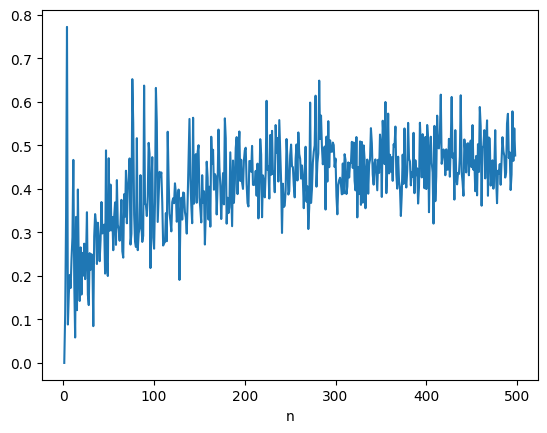

In [52]:
# Plot gap avg vs. n

ad_hoc_solutions.groupby("n")["gap"].mean().plot()

In [ ]:
import seaborn as sns

[]

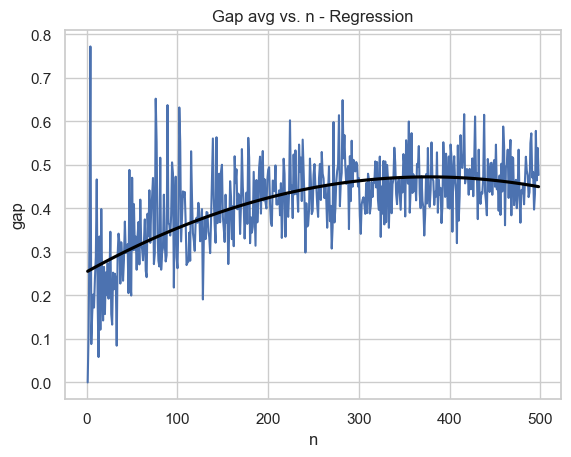

In [69]:
# Add a regression line

#reset axes
ad_hoc_solutions.groupby("n")["gap"].mean().plot()
sns.set_theme(style="whitegrid")

ax = sns.regplot(
                x="n",
                y="gap",
                data=ad_hoc_solutions,
                order=2,
                ci=None,
                color="black",
                marker="",
            )


#set title to "Gap avg vs. n - Regression"
ax.set_title("Gap avg vs. n - Regression")

ax.plot()
